# Mini Project - Loan Eligibility
## Data Description

#### This dataset contains customer data from a car insurance company. It contains multiple kinds of information such as:
* Personal data - gender, location, education, income, etc
* Vehicle data - vehicle size and class
* Policy data - monthly premium, policy type, time since last claim, total claim amount, etc

## Goal

#### The goal of this study is to develop a model that best predicts the total amount a new customer will claim on their insurance policy.
* This model will have as a target the Total Claim Amount column on the dataset, which contains the claimed amount for all the already insured customers.
* To achieve this, the model will take in the several different features contained in the dataset.

In [766]:
#! pip install imblearn

In [843]:
import pandas as pd
import numpy as np

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('default')

In [768]:
def print_full(x, n):
    pd.set_option('display.min_rows', n)
    display(x)
    pd.reset_option('display.min_rows')

In [769]:
df = pd.read_csv('../(source)/loan/Loan_Data.csv')

In [770]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.columns = [col.lower().replace('/', '_') for col in df.columns]
df.columns.values

array(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome',
       'loanamount', 'loan_amount_term', 'credit_history',
       'property_area', 'loan_status'], dtype=object)

In [771]:
df

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# I. Data cleaning and exploration
## a. Explore and clean categorical columns

In [772]:
df.select_dtypes('object')

,loan_id,gender,married,dependents,education,self_employed,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


#### Dropping ID column as it is irrelevant information

In [773]:
df = df.drop(['loan_id'],axis=1)
df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Visualizing and dealing with missing values
* filling in Nans with the column's most promiment value

In [774]:
for col in df.select_dtypes('object'):
    print(col, 'nulls: ', df[col].isna().sum())
    display(df[col].value_counts())
    print('__________________________________', '\n')

gender nulls:  13


Male      489
Female    112
Name: gender, dtype: int64

__________________________________ 

married nulls:  3


Yes    398
No     213
Name: married, dtype: int64

__________________________________ 

dependents nulls:  15


0     345
1     102
2     101
3+     51
Name: dependents, dtype: int64

__________________________________ 

education nulls:  0


Graduate        480
Not Graduate    134
Name: education, dtype: int64

__________________________________ 

self_employed nulls:  32


No     500
Yes     82
Name: self_employed, dtype: int64

__________________________________ 

property_area nulls:  0


Semiurban    233
Urban        202
Rural        179
Name: property_area, dtype: int64

__________________________________ 

loan_status nulls:  0


Y    422
N    192
Name: loan_status, dtype: int64

__________________________________ 



In [775]:
df['gender'] = df['gender'].fillna('Male')
df['married'] = df['married'].fillna('Yes')
df['dependents'] = df['dependents'].fillna('0')
df['gender'] = df['gender'].fillna('Male')
df['self_employed'] = df['self_employed'].fillna('No')

In [776]:
for col in df.select_dtypes('object'):
    print(col, 'nulls: ', df[col].isna().sum())
    display(df[col].value_counts())
    print('__________________________________', '\n')

gender nulls:  0


Male      502
Female    112
Name: gender, dtype: int64

__________________________________ 

married nulls:  0


Yes    401
No     213
Name: married, dtype: int64

__________________________________ 

dependents nulls:  0


0     360
1     102
2     101
3+     51
Name: dependents, dtype: int64

__________________________________ 

education nulls:  0


Graduate        480
Not Graduate    134
Name: education, dtype: int64

__________________________________ 

self_employed nulls:  0


No     532
Yes     82
Name: self_employed, dtype: int64

__________________________________ 

property_area nulls:  0


Semiurban    233
Urban        202
Rural        179
Name: property_area, dtype: int64

__________________________________ 

loan_status nulls:  0


Y    422
N    192
Name: loan_status, dtype: int64

__________________________________ 



#### Converting 'dependents' to numerical

In [777]:
df['dependents'] = df['dependents'].str[:1].astype(int) 
df['dependents']

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: dependents, Length: 614, dtype: int32

## b. Explore and clean numerical columns

In [778]:
df.select_dtypes('number')

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
0,0,5849,0.0,NaN,360.0,1.0
1,1,4583,1508.0,128.0,360.0,1.0
2,0,3000,0.0,66.0,360.0,1.0
3,0,2583,2358.0,120.0,360.0,1.0
4,0,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0
610,3,4106,0.0,40.0,180.0,1.0
611,1,8072,240.0,253.0,360.0,1.0
612,2,7583,0.0,187.0,360.0,1.0


In [779]:
df.select_dtypes('number').describe()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.744300,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.009623,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,1.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Checking for missing values

In [780]:
for col in df.select_dtypes('number'):
    print(col, 'nulls: ', df[col].isna().sum())

dependents nulls:  0
applicantincome nulls:  0
coapplicantincome nulls:  0
loanamount nulls:  22
loan_amount_term nulls:  14
credit_history nulls:  50


In [781]:
for col in df[['loanamount','loan_amount_term','credit_history']]:
    display(df[col].value_counts())

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: loanamount, Length: 203, dtype: int64

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: loan_amount_term, dtype: int64

1.0    475
0.0     89
Name: credit_history, dtype: int64

#### 'credit_history' contains discrete values
* filling in Nans with the most prominent value in the column

In [782]:
#df['credit_history'] = df['credit_history'].fillna(1.0)

df = df[df['credit_history'].notnull()]
display(df['credit_history'].isna().sum())
df['credit_history'].value_counts()

0

1.0    475
0.0     89
Name: credit_history, dtype: int64

#### the same applies to 'loan_amount_term'
* filling in Nans with the most prominent value in the column
* neglegible change to mean and std of values in column

In [783]:
warnings.filterwarnings('ignore')

df['loan_amount_term'] = df['loan_amount_term'].fillna(360.0)

warnings.filterwarnings('default')

display(df['loan_amount_term'].isna().sum())
display(df['loan_amount_term'].describe())
df['loan_amount_term'].value_counts()

0

count    564.000000
mean     342.595745
std       63.838715
min       36.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: loan_amount_term, dtype: float64

360.0    484
180.0     43
480.0     14
300.0     10
120.0      3
240.0      3
84.0       3
60.0       2
36.0       2
Name: loan_amount_term, dtype: int64

####  'loanamount'
* filling in Nans with the median value

In [784]:
warnings.filterwarnings('ignore')

df['loanamount'] = df['loanamount'].fillna(df['loanamount'].median())

warnings.filterwarnings('default')

display(df['loanamount'].isna().sum())
df['loanamount'].describe()

0

count    564.000000
mean     144.414894
std       81.812775
min        9.000000
25%      101.750000
50%      127.000000
75%      162.000000
max      700.000000
Name: loanamount, dtype: float64

In [785]:
df.select_dtypes('number').dtypes

dependents             int32
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
dtype: object

#### converting discrete columns 'loan_amount_term' and 'credit_history' to int type

In [786]:
warnings.filterwarnings('ignore')

df['loan_amount_term'] = df['loan_amount_term'].astype(int)
df['credit_history'] = df['credit_history'].astype(int)

warnings.filterwarnings('default')

display(df['loan_amount_term'])
df['credit_history']

0      360
1      360
2      360
3      360
4      360
      ... 
609    360
610    180
611    360
612    360
613    360
Name: loan_amount_term, Length: 564, dtype: int32

0      1
1      1
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: credit_history, Length: 564, dtype: int32

In [787]:
df.isna().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

# II. Visualizations, Data Processing

## a. Visualizing and analyzing numerical columns

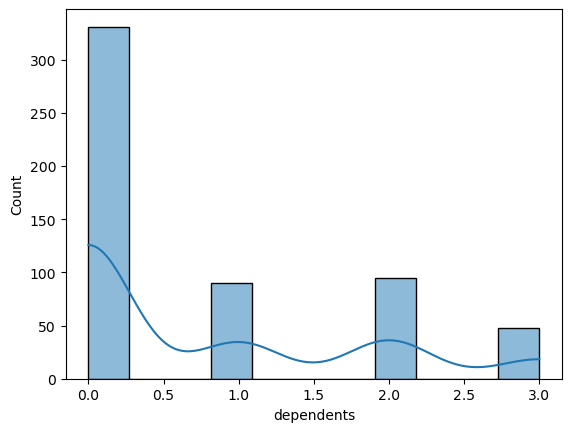

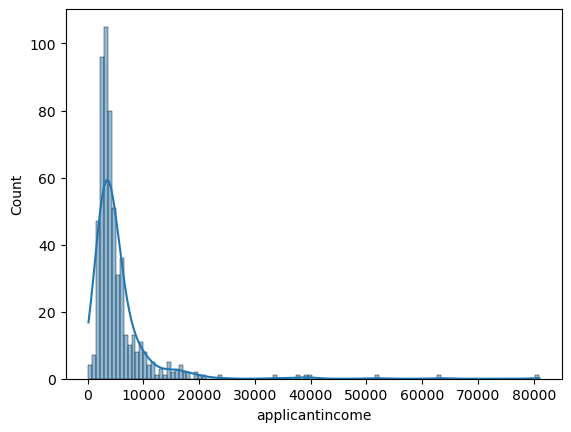

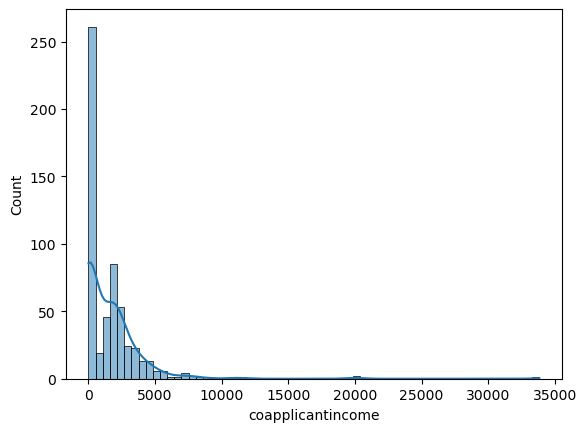

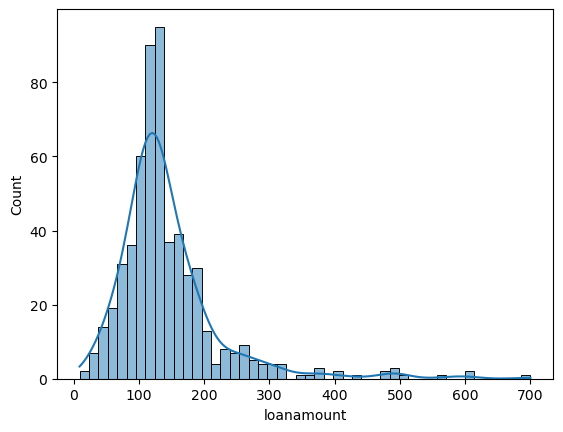

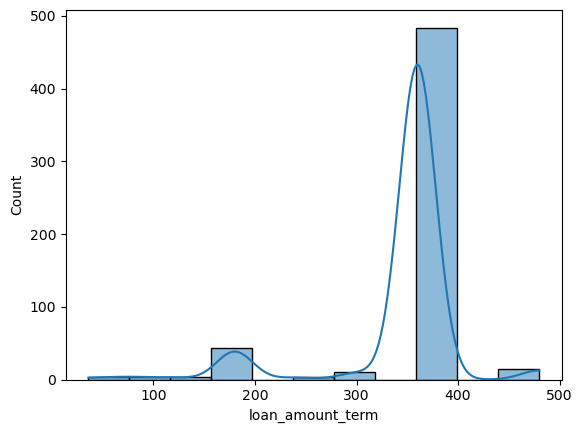

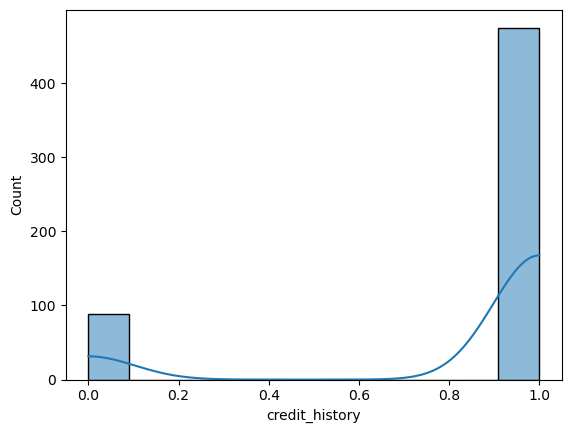

In [788]:
num_cols = df.select_dtypes('number')
for col in num_cols.columns:
  sns.histplot(num_cols[col], kde=True)
  plt.show()

### As seen above:
#### 'loanamount', 'applicantincome':
* non-discrete values, follow a normal distribution, with a skew to the positive side, which makes sense when dealing with monetary values.
#### 'coapplicantincome':
* also non-discrete values, positively skewed normal distribution, with a large spike at 0, which represents that fact that not all entries have a coapplicant
#### 'dependents' and 'loan_amount_term':
* Discrete columns, even with a small number of possible values still resemble a normal distribution

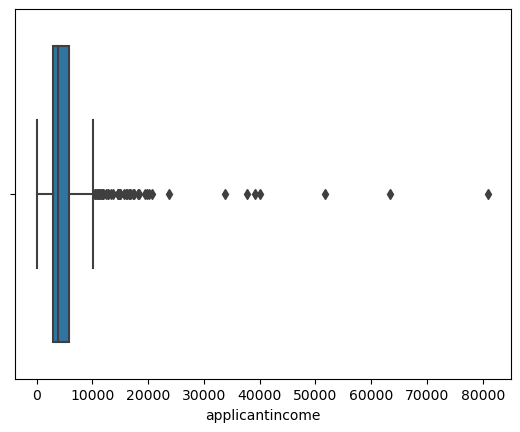

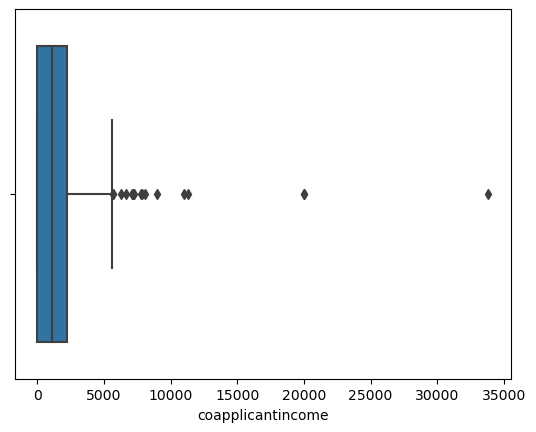

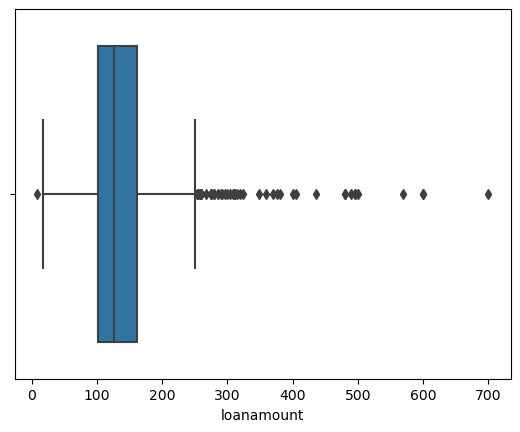

In [789]:
sns.boxplot(x=df['applicantincome'])
plt.show()
sns.boxplot(x=df['coapplicantincome'])
plt.show()
sns.boxplot(x=df['loanamount'])
plt.show()

### As seen above:
#### 'loanamount', 'applicantincome' and 'coapplicantincome':
* continuous columns have a significant presence of outliers on the positive side

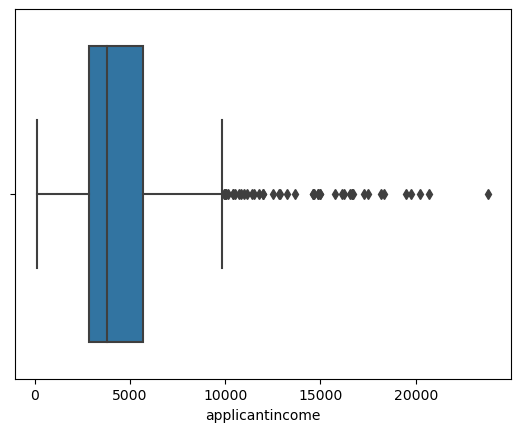

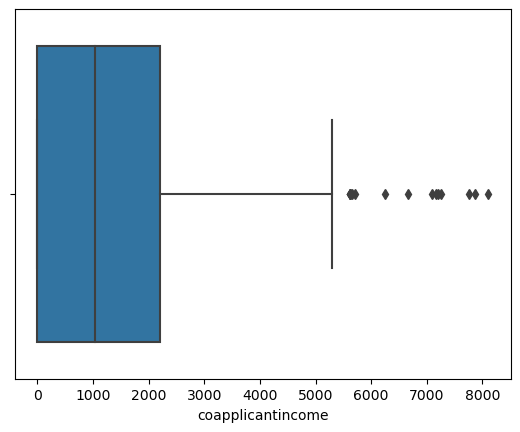

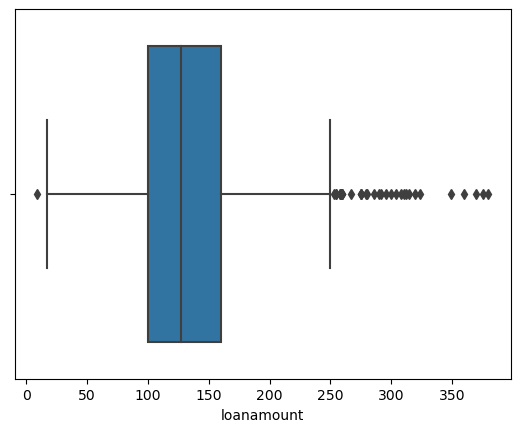

In [790]:
warnings.filterwarnings('ignore')

df['applicantincome'] = df['applicantincome'][(np.abs(stats.zscore(df['applicantincome'])) < 3)]
df['coapplicantincome'] = df['coapplicantincome'][(np.abs(stats.zscore(df['coapplicantincome'])) < 3)]
df['loanamount'] = df['loanamount'][(np.abs(stats.zscore(df['loanamount'])) < 3)]

warnings.filterwarnings('default')

sns.boxplot(x=df['applicantincome'])
plt.show()
sns.boxplot(x=df['coapplicantincome'])
plt.show()
sns.boxplot(x=df['loanamount'])
plt.show()

In [791]:
df.isna().sum()

gender                0
married               0
dependents            0
education             0
self_employed         0
applicantincome       7
coapplicantincome     6
loanamount           13
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64

In [792]:
df = df[df['loanamount'].notnull()]
df = df[df['coapplicantincome'].notnull()]
df = df[df['applicantincome'].notnull()]
df.isna().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
dependents,1.000000,0.129492,-0.011969,0.183805,-0.094818,-0.038702
applicantincome,0.129492,1.000000,-0.126174,0.564557,-0.061693,-0.014715
coapplicantincome,-0.011969,-0.126174,1.000000,0.159159,-0.000967,-0.002056
loanamount,0.183805,0.564557,0.159159,1.000000,0.021043,-0.007502
loan_amount_term,-0.094818,-0.061693,-0.000967,0.021043,1.000000,-0.003735
credit_history,-0.038702,-0.014715,-0.002056,-0.007502,-0.003735,1.000000


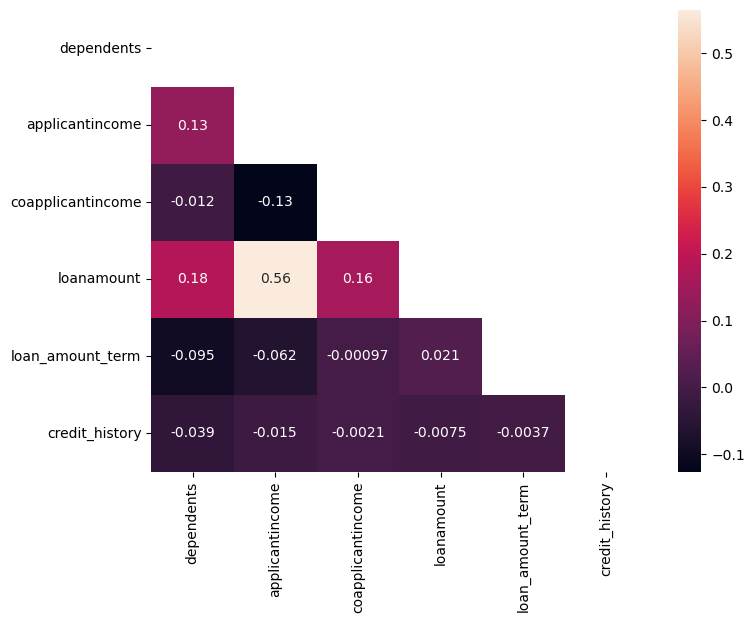

In [793]:
corr_matrix = num_cols.corr()
display(corr_matrix)

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()

### As seen above:
#### No features show any high level of correlation amongst themselves:
* highest value of 0.57 of 'applicantincome'/'loanamount' shows some correlation but not considered high.
    * shows that the amount loaned to the applicant somewhat takes into account their level of income
* 
* followed by 'coapplicantincome'/'loanamount' with 0.19 and 'dependents'/'loanamount' with 0.16 showing a very small degree of correlation

## b. Checking relationships between numerical features and categorical target

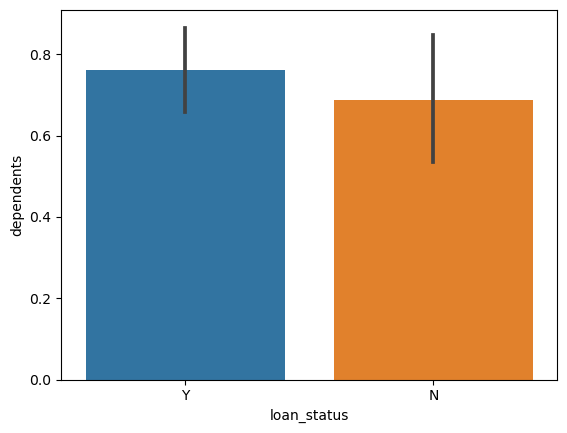

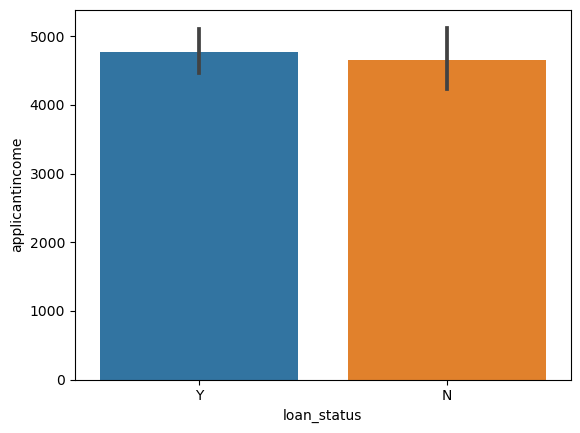

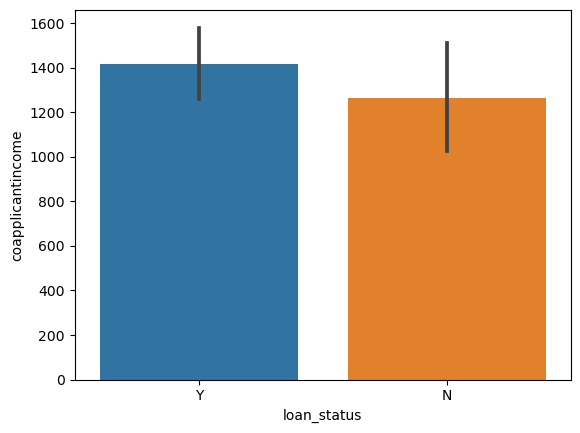

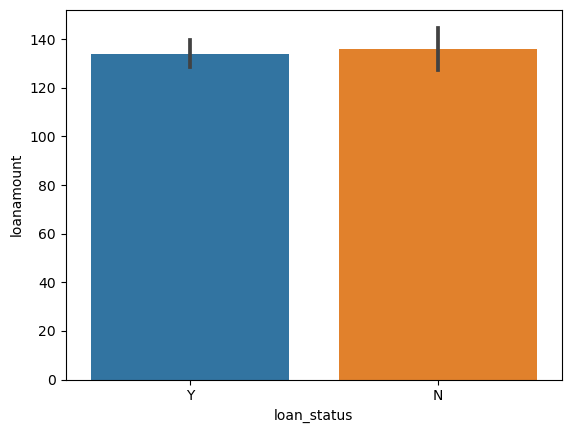

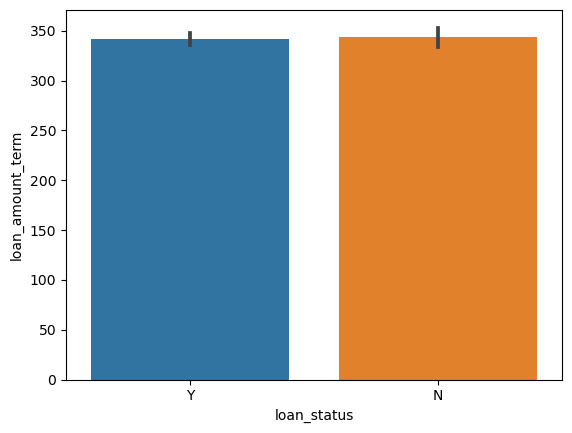

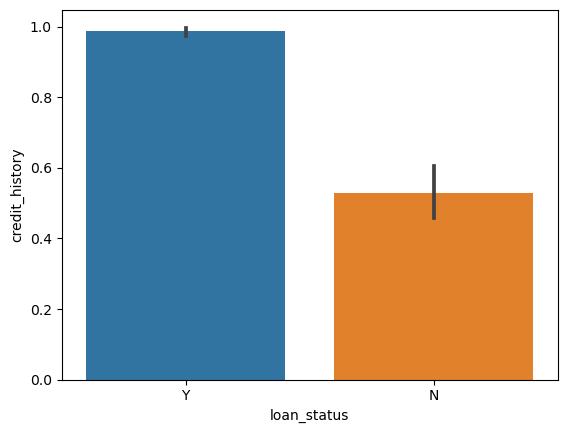

In [794]:
for col in num_cols.columns:
  sns.barplot(data=df, x='loan_status', y=col)
  plt.show()

### As seen above:
#### 'dependents', 'applicantincome' and 'loan_amount':
* Pratically 50/50 split with the target's values 'Y/N'.
#### 'coapplicantincome':
* Tends slighty towards 'N' but no useful insight to be taken.
#### 'credit_history':
* Large tendency towards 'Y', indicating there is some correlation between the applicant having a credit history and getting the approval on the loan.

## c. Visualizing categorical features

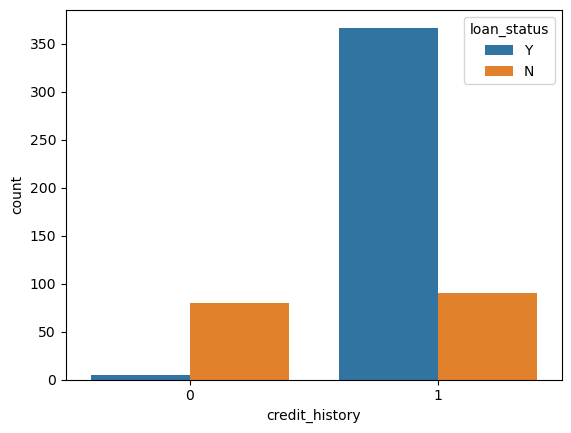

1    457
0     85
Name: credit_history, dtype: int64
_________________________________________________________________________________ 



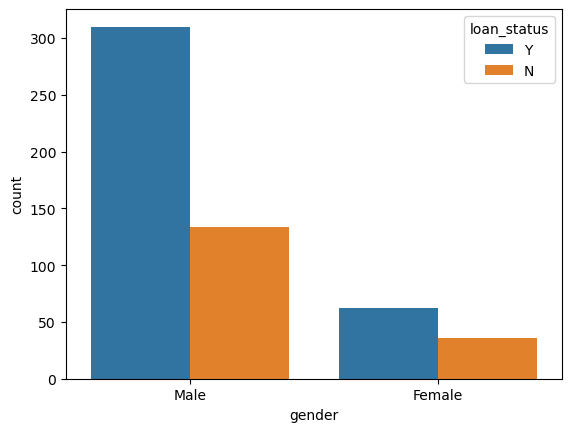

Male      444
Female     98
Name: gender, dtype: int64
_________________________________________________________________________________ 



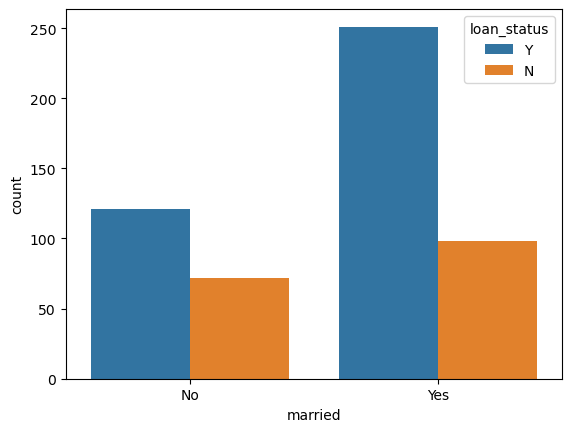

Yes    349
No     193
Name: married, dtype: int64
_________________________________________________________________________________ 



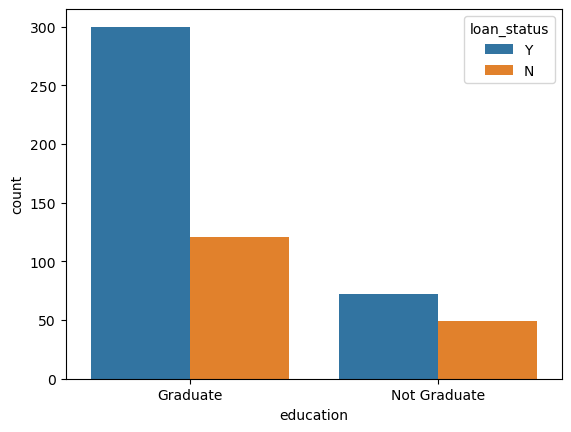

Graduate        421
Not Graduate    121
Name: education, dtype: int64
_________________________________________________________________________________ 



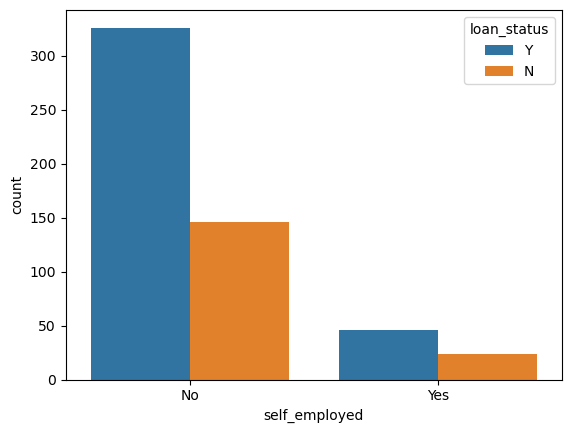

No     472
Yes     70
Name: self_employed, dtype: int64
_________________________________________________________________________________ 



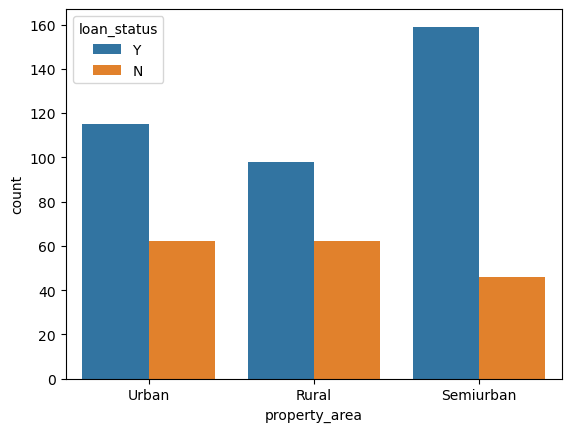

Semiurban    205
Urban        177
Rural        160
Name: property_area, dtype: int64
_________________________________________________________________________________ 



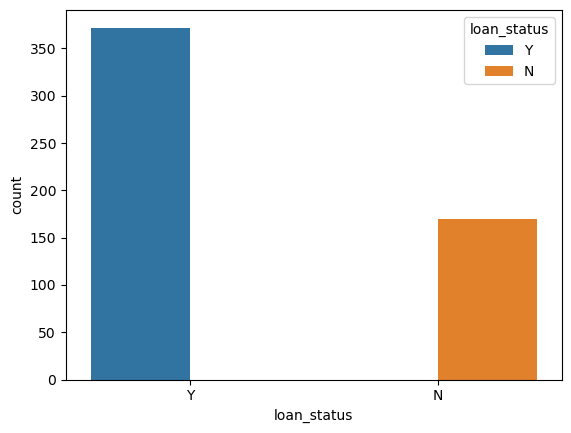

Y    372
N    170
Name: loan_status, dtype: int64
_________________________________________________________________________________ 



In [795]:
#including credit_history - column is numerical but values are binary
sns.countplot(x = 'credit_history', hue = 'loan_status', data = df)
plt.show()
print(df['credit_history'].value_counts())
print('_________________________________________________________________________________', '\n')

for col in df.select_dtypes('object').columns:
    sns.countplot(x = col, hue = 'loan_status', data = df)
    plt.show()
    print(df[col].value_counts())
    print('_________________________________________________________________________________', '\n')

### As seen above
#### Analyzing applicant distribution:
* By a large ratio, most applicants are male, have a credit history, are graduates and not self-employed
* 2:1 applicants are married
* Applicants are mostly equaly distributed by property area
* target - 2:1 applicants get approved for the loan

## d. Creating a contingency table to analyze categorical features against the target

In [796]:
warnings.filterwarnings('ignore')

for col in df.select_dtypes('object'):
    cont_table = pd.crosstab(df[col], df['loan_status']).copy()
    
    cont_table['Y%'] = round((cont_table['Y'] / cont_table.sum(axis=1))*100,1)
    cont_table.loc['_%'] = 0
    cont_table['Y'].loc['_%'] = round(cont_table['Y'][0] / cont_table['Y'].sum()*100,1)
    cont_table['N'].loc['_%'] = round(cont_table['N'][0] / cont_table['N'].sum()*100,1)

    display(cont_table)

warnings.filterwarnings('default')

loan_status,N,Y,Y%
gender,,,
Female,36.0,62.0,63.3
Male,134.0,310.0,69.8
_%,21.2,16.7,0.0


loan_status,N,Y,Y%
married,,,
No,72.0,121.0,62.7
Yes,98.0,251.0,71.9
_%,42.4,32.5,0.0


loan_status,N,Y,Y%
education,,,
Graduate,121.0,300.0,71.3
Not Graduate,49.0,72.0,59.5
_%,71.2,80.6,0.0


loan_status,N,Y,Y%
self_employed,,,
No,146.0,326.0,69.1
Yes,24.0,46.0,65.7
_%,85.9,87.6,0.0


loan_status,N,Y,Y%
property_area,,,
Rural,62.0,98.0,61.3
Semiurban,46.0,159.0,77.6
Urban,62.0,115.0,65.0
_%,36.5,26.3,0.0


loan_status,N,Y,Y%
loan_status,,,
N,170,0,0.0
Y,0,372,100.0
_%,100,0,0.0


### As seen above:
#### In 'property_area':
* Correlation between the area the property is in and the chance for loan approval
    * Semiurban properties have a higher loan approval rate of 76.8% compared to urban and rural properties at 65.8% and 61% respectively
#### In 'married' and 'education':
* Small variance of ~10% in correlation between the applicant's marital status and the loan approval
    * Married applicants at a higher rate of approval vs. not married
* Small variance of ~10% in correlation between the applicant's level of education and the loan approval
    * Graduate applicants at a higher rate of approval vs. non-graduates
#### In 'gender' and 'self-employed':
* Even or close to even distribution in the applicant's gender / type of employment and the loan approval

# III. Preparing and applying first model

#### X/Y split

In [813]:
y = df['loan_status']
X = df.drop('loan_status', axis=1)

## a. Enconding categorical columns to obtain numerical values for the model

In [814]:
X = pd.get_dummies(X, columns=X.select_dtypes('object').columns.tolist())
X

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,gender_Female,gender_Male,married_No,married_Yes,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,0,5849.0,0.0,127.0,360,1,0,1,1,0,1,0,1,0,0,0,1
1,1,4583.0,1508.0,128.0,360,1,0,1,0,1,1,0,1,0,1,0,0
2,0,3000.0,0.0,66.0,360,1,0,1,0,1,1,0,0,1,0,0,1
3,0,2583.0,2358.0,120.0,360,1,0,1,0,1,0,1,1,0,0,0,1
4,0,6000.0,0.0,141.0,360,1,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900.0,0.0,71.0,360,1,1,0,1,0,1,0,1,0,1,0,0
610,3,4106.0,0.0,40.0,180,1,0,1,0,1,1,0,1,0,1,0,0
611,1,8072.0,240.0,253.0,360,1,0,1,0,1,1,0,1,0,0,0,1
612,2,7583.0,0.0,187.0,360,1,0,1,0,1,1,0,1,0,0,0,1


## b. Creating a correlation list of categorical features against the target

In [815]:
pd.get_dummies(df).corr()['loan_status_Y'].sort_values()

loan_status_N             -1.000000
education_Not Graduate    -0.105500
property_area_Rural       -0.103006
married_No                -0.095210
property_area_Urban       -0.054976
gender_Female             -0.054369
self_employed_Yes         -0.024240
loanamount                -0.015428
loan_amount_term          -0.010101
applicantincome            0.018094
self_employed_No           0.024240
dependents                 0.033316
coapplicantincome          0.044744
gender_Male                0.054369
married_Yes                0.095210
education_Graduate         0.105500
property_area_Semiurban    0.150050
credit_history             0.583290
loan_status_Y              1.000000
Name: loan_status_Y, dtype: float64

In [816]:
pd.get_dummies(df).corr()['loan_status_N'].sort_values()

loan_status_Y             -1.000000
credit_history            -0.583290
property_area_Semiurban   -0.150050
education_Graduate        -0.105500
married_Yes               -0.095210
gender_Male               -0.054369
coapplicantincome         -0.044744
dependents                -0.033316
self_employed_No          -0.024240
applicantincome           -0.018094
loan_amount_term           0.010101
loanamount                 0.015428
self_employed_Yes          0.024240
gender_Female              0.054369
property_area_Urban        0.054976
married_No                 0.095210
property_area_Rural        0.103006
education_Not Graduate     0.105500
loan_status_N              1.000000
Name: loan_status_N, dtype: float64

### As seen above:
#### Correlations between target and encoded values matching previously seen observations:
* 'credit_history'(1) showing a significant level of correlation to target - 0.54
* followed by a small degree of correlation in 'property_area_Semiurban', 'property_area_Rural'(negative), 'married_Yes' and 'education_Graduate' in decreasing order

## c. Splitting data into train/test sets to fit into a logistic regression model

In [844]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [818]:
classification = LogisticRegression(random_state=42, max_iter=1000)

classification.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## d. Applying LogisticRegression model
 * obtaining accuracy score and predictions, testing data for imbalance

In [819]:
y_test.value_counts()

Y    120
N     43
Name: loan_status, dtype: int64

[[0.141 0.123]
 [0.    0.736]]


0.8773006134969326

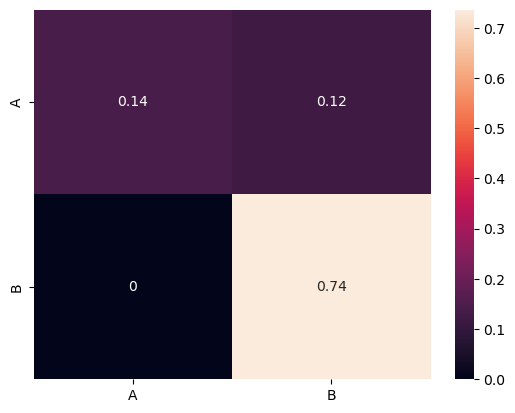

In [820]:
predictions = classification.predict(X_test)
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
print(np.round(cf_matrix,3))
sns.heatmap(cf_matrix, annot=True, xticklabels=["A", "B"], yticklabels=["A", "B"])
classification.score(X_test, y_test)

#### first results
* 0.12 / 0.23
* 0.01 / 0.64
#### dropping nans in credit history
* 0.18 / 0.14
* 0.00 / 0.68
#### dropping outliers in continuous columns
* 0.14 / 0.12
* 0.00 / 0.74

# IV. Sampling, scaling and Testing different models

## a. StandardScaler

In [839]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [845]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

## b. Sampling
* RandomOverSampler

In [840]:
sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)

* SMOTE

In [846]:
sampler = SMOTE(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)

## c. Reappyling LogisticRegression model

In [847]:
classification = LogisticRegression(random_state=42, max_iter=1000)
classification.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=42)

0.5950920245398773

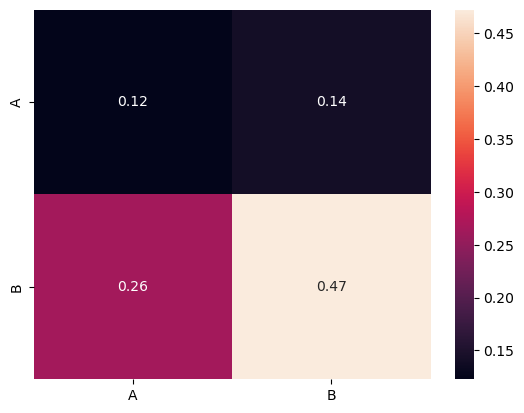

In [848]:
predictions = classification.predict(X_test.values)
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, xticklabels=["A", "B"], yticklabels=["A", "B"])
classification.score(X_test.values, y_test)

#### StandardScaler:
* no change

## d. RandomForest

In [714]:
n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

In [715]:
model = RandomForestClassifier()

In [716]:
gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

In [717]:
gridRandomForest.fit(X_standard, y_ros)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([100])})

In [718]:
random_forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)

In [719]:
random_forest.fit(X_standard, y_ros)

RandomForestClassifier(random_state=0)

In [720]:
predictions = random_forest.predict(X_test.values)

<Axes: >

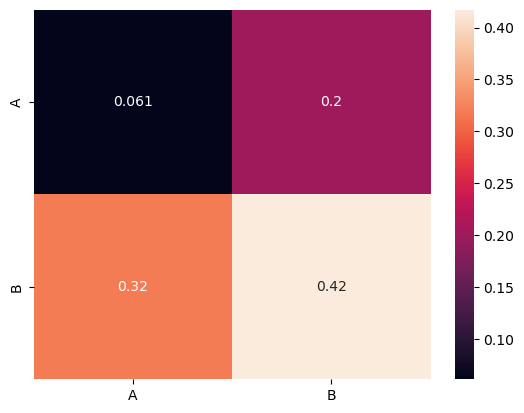

In [721]:
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, xticklabels=["A", "B"], yticklabels=["A", "B"])